In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./StudentsPerformance.csv")
df.head()
passmark = 30

In [21]:
print('StudentsPerformance:',type(df))
df

StudentsPerformance: <class 'pandas.core.frame.DataFrame'>


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.333333,E
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,P,P,P,P,282,94.000000,A
996,male,group C,high school,free/reduced,none,62,55,55,P,P,P,P,172,57.333333,D
997,female,group C,high school,free/reduced,completed,59,71,65,P,P,P,P,195,65.000000,C
998,female,group D,some college,standard,completed,68,78,77,P,P,P,P,223,74.333333,B


In [23]:
df.sum()
print('DataFrame크기:', df.shape)

DataFrame크기: (1000, 15)


In [27]:
df.groupby(['gender','parental level of education'])['gender'].count()

gender  parental level of education
female  associate's degree             116
        bachelor's degree               63
        high school                     94
        master's degree                 36
        some college                   118
        some high school                91
male    associate's degree             106
        bachelor's degree               55
        high school                    102
        master's degree                 23
        some college                   108
        some high school                88
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='math score'>

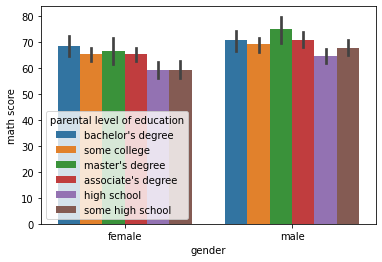

In [34]:
sns.barplot(x='gender',y='math score', hue ='parental level of education', data=df)


<AxesSubplot:xlabel='gender', ylabel='reading score'>

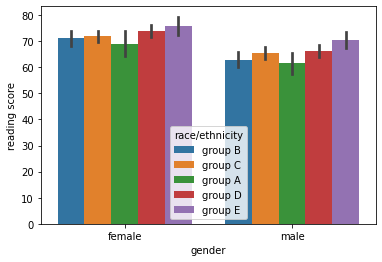

In [35]:
sns.barplot(x='gender',y='reading score',hue='race/ethnicity', data=df)

<AxesSubplot:xlabel='gender', ylabel='writing score'>

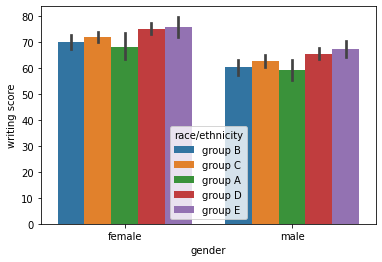

In [36]:
sns.barplot(x='gender',y='writing score',hue='race/ethnicity', data=df)

In [48]:
import scipy.stats as stats

for item in ['gender', 'race/ethnicity','math score','writing score','reading score']:
    print(item)
    X = df[item].values
    print('Covariance: {:.2f}'.format(np.cov(X,Y)[0,1]))
    print('Correleation: {:.2f}'.format(stats.pearsonr(X,Y)[0]))
    print('P-value: {:.4f}'.format(stats.pearsonr(X,Y)[1]))
    print('\n')

gender


TypeError: unsupported operand type(s) for /: 'str' and 'int'

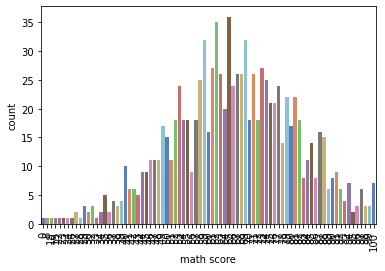

In [4]:
p = sns.countplot(x="math score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [7]:
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    998
F      2
Name: Math_PassStatus, dtype: int64

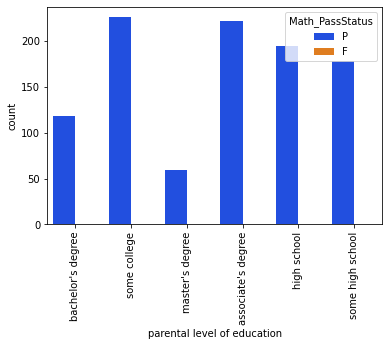

In [8]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

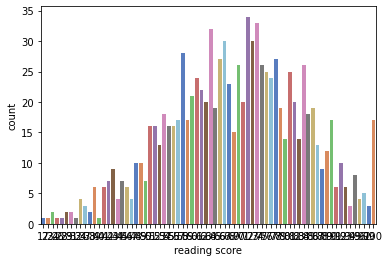

In [9]:
sns.countplot(x="reading score", data = df, palette="muted")
plt.show()

In [10]:
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    1000
Name: Reading_PassStatus, dtype: int64

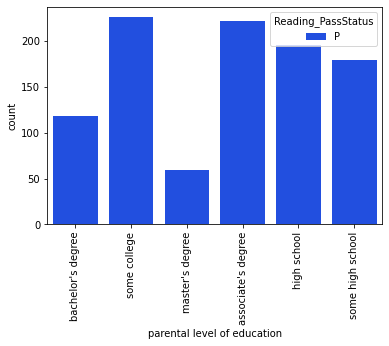

In [11]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

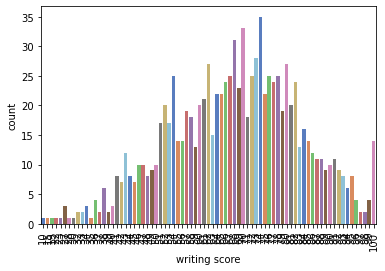

In [12]:
p = sns.countplot(x="writing score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

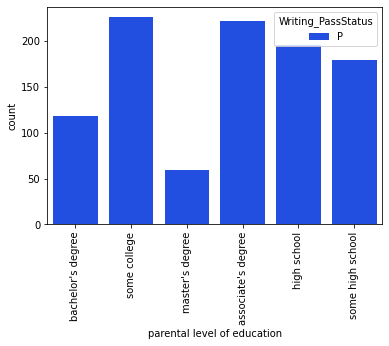

In [13]:
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 



In [14]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

P    998
F      2
Name: OverAll_PassStatus, dtype: int64

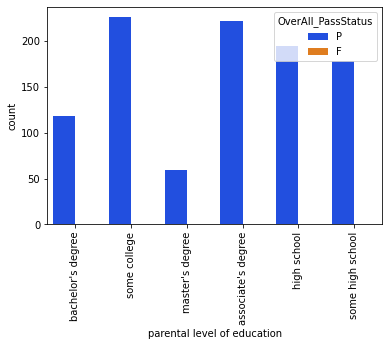

In [15]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [16]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

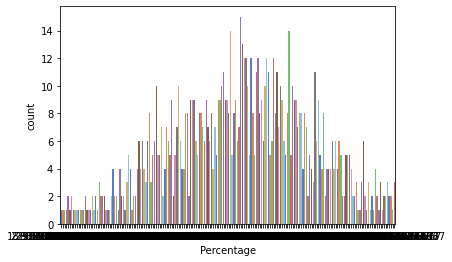

In [17]:
p = sns.countplot(x="Percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 

In [18]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

B    261
C    256
A    198
D    182
E     73
F     30
Name: Grade, dtype: int64

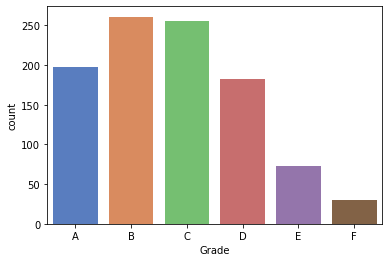

In [19]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

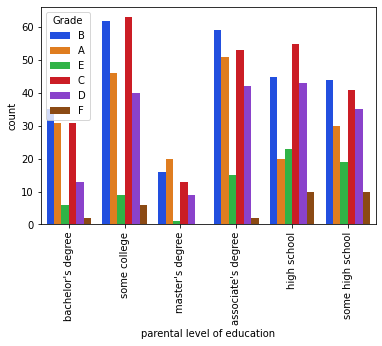

In [20]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 